In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense,Input,GlobalAveragePooling2D,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

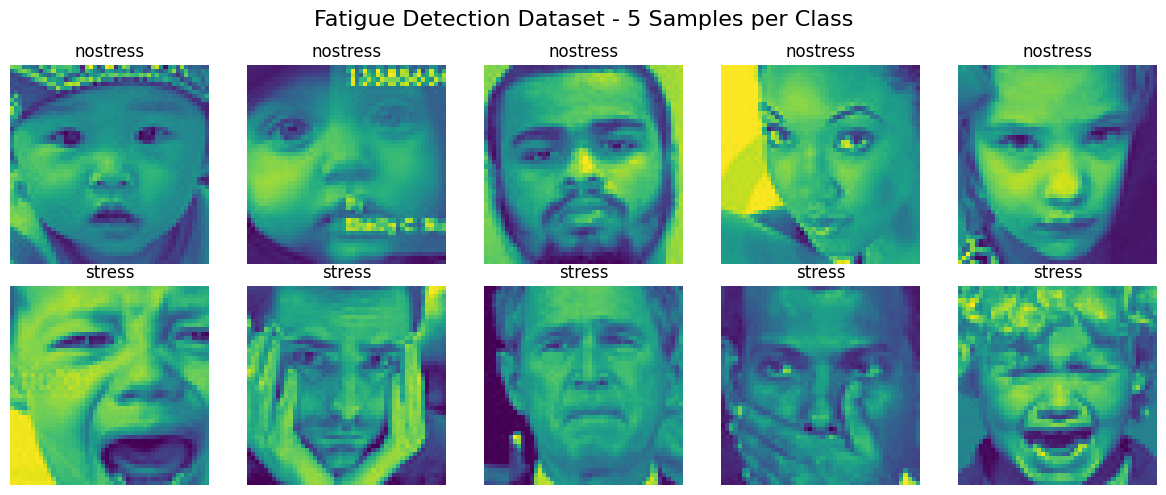

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Base directory
base_dir = "/home/jay/Face_Analysis/datasets/fatigue_test"
labels = ["nostress", "stress"]

# Plot 5 images per label
plt.figure(figsize=(12, 5))

for idx, label in enumerate(labels):
    label_dir = os.path.join(base_dir, label)
    image_files = os.listdir(label_dir)[:5]  # take 5 images

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(label_dir, img_file)
        img = Image.open(img_path)

        plt.subplot(2, 5, idx * 5 + i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(label)

plt.suptitle("Fatigue Detection Dataset - 5 Samples per Class", fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
Batch_size = 128
picture_size = 100
folder_path = "/home/jay/Face_Analysis/datasets/fatigue_"

# Augmentation for training
datagen_train = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

# No Augmentation for testing
datagen_test = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size = (picture_size,picture_size),
    color_mode = "grayscale",
    batch_size = Batch_size,
    class_mode = "categorical",
    shuffle = True
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size = (picture_size,picture_size),
    color_mode = "grayscale",
    batch_size = Batch_size,
    class_mode = "categorical",
    shuffle = False
)


Found 9795 images belonging to 2 classes.
Found 2480 images belonging to 2 classes.


In [12]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

no_of_classes = 2

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(100, 100, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (3, 3), padding='same'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(256, (3, 3), padding='same'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(256, (3, 3), padding='same'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected layers
model.add(Flatten())

model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))  #  labels are likely one-hot encoded - e.g. [1, 0] for "stress", [0, 1] for "no stress".



# Compile model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 3,356,802 (12.81 MB)

 Trainable params: 3,354,626 (12.80 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [13]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

# save best model based on validation accuracy
checkpoint = ModelCheckpoint(
    filepath = "best_fatigue_model.keras",
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1
)

# Stop training early if no improvement in validation loss
early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 5,
    restore_best_weights = True,
    verbose = 1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6              # prevents LR from going too low
)

callbacks_list = [checkpoint, early_stopping, reduce_lr]


epochs = 48

In [ ]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=callbacks_list,
    verbose=1
)